<a href="https://colab.research.google.com/github/Temmy-bit/Advance-Computer-Vision-Course/blob/main/slide_and_seek_classification_for_landslide_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train.csv:
          ID  label
0  ID_HUD1ST      1
1  ID_KGE2HY      1
2  ID_VHV9BL      1
3  ID_ZT0VEJ      0
4  ID_5NFXVY      0
Test.csv:
          ID
0  ID_ICB8K9
1  ID_2D4AOJ
2  ID_2TVPI0
3  ID_E05WIK
4  ID_KKFDJO


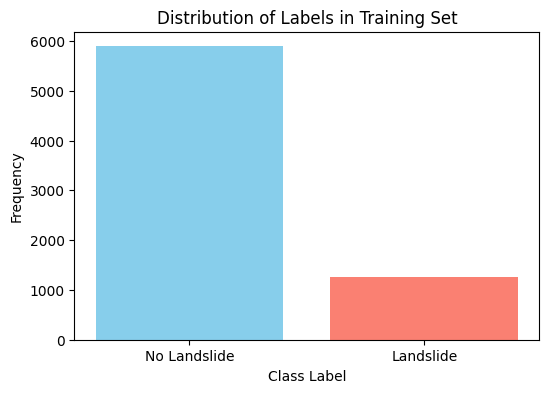

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = "/kaggle/input/slideandseekclasificationlandslidedetectiondataset"

# Define paths for the dataset (remember to unzip the dataset first!)
train_csv_path = f'{data}/Train.csv'  # Path to the training labels CSV file
test_csv_path = f'{data}/Test.csv'    # Path to the test image IDs CSV file
train_data_path = f'{data}/train_data'  # Folder where .npy train files are located
test_data_path = f'{data}/test_data'    # Folder where .npy test files are located

# # Load Train.csv and inspect the data
train_df = pd.read_csv(train_csv_path)
print("Train.csv:")
print(train_df.head())

# # Load Test.csv and inspect the data
test_df = pd.read_csv(test_csv_path)
print("Test.csv:")
print(test_df.head())

train_df.label.value_counts()

# Check distribution of labels
label_counts = train_df['label'].value_counts()
labels = ['No Landslide', 'Landslide']  # Map the labels 0 and 1 to descriptive names

plt.figure(figsize=(6, 4))
plt.bar(labels, label_counts.values, color=['skyblue', 'salmon'])
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Distribution of Labels in Training Set")
plt.show()



In [ ]:
!nvidia-smi

Fri Aug  1 12:29:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
train_2, test_2 = train_test_split(train_df,test_size=0.3)

In [ ]:
test_2.head()

,ID,label
5100,ID_396L66,0
2628,ID_9BAQUE,0
5607,ID_0CKONT,0
1048,ID_BF9W67,0
310,ID_VGYVQR,0


In [ ]:
train_2.head()

,ID,label
2191,ID_GFLA2H,0
4020,ID_H7L7II,0
4905,ID_XHK4MV,0
3657,ID_3JWWED,0
1905,ID_VUHG1U,0


In [ ]:
train_2['label'].value_counts()

label
0    4123
1     879
Name: count, dtype: int64

In [ ]:
test_2['label'].value_counts()

label
0    1769
1     376
Name: count, dtype: int64

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os

class LabeledNpyDataset(Dataset):
    def __init__(self, dataframe, features_dir, transform=None,train=False):
        self.df = dataframe.reset_index(drop=True)
        self.features_dir = features_dir
        self.transform = transform
        self.train = train

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.df.loc[idx, 'ID']+'.npy'
        if self.train == True:
            label = self.df.loc[idx, 'label']
            # print(file_name,label)
            y = torch.tensor(label, dtype=torch.float32)


        else:
            y=0

        # Load .npy file
        feature_path = os.path.join(self.features_dir, file_name)
        x = np.load(feature_path)
        # print(x)
        # x = torch.tensor(x, dtype=torch.float32)

        if self.transform:
            x = self.transform(x)

        else:
            x = torch.tensor(x, dtype=torch.float32)

        # y = torch.tensor(label, dtype=torch.long)
        return x, y


In [ ]:
from torchvision import transforms

In [ ]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts (H, W, C) ndarray in [0, 1] to (C, H, W) tensor
    transforms.RandomRotation(40),
    transforms.RandomAffine(0, translate=(0.2, 0.2), shear=20, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.5]*12, [0.5]*12),  # Assuming 12 bands, normalize to [-1, 1]
])

In [ ]:
data_transform(np.random.rand(64,64,12)).shape

torch.Size([12, 64, 64])

In [ ]:
np.load('/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data/ID_005GY8.npy').shape

(64, 64, 12)

In [ ]:
example_ids = train_df['ID'].sample(2).values  # Randomly select 2 image IDs for illustration
print(train_df[train_df['ID'].isin(example_ids)]['label'])
print(example_ids)

2785    0
4618    0
Name: label, dtype: int64
['ID_SN4U9H' 'ID_EITUKG']


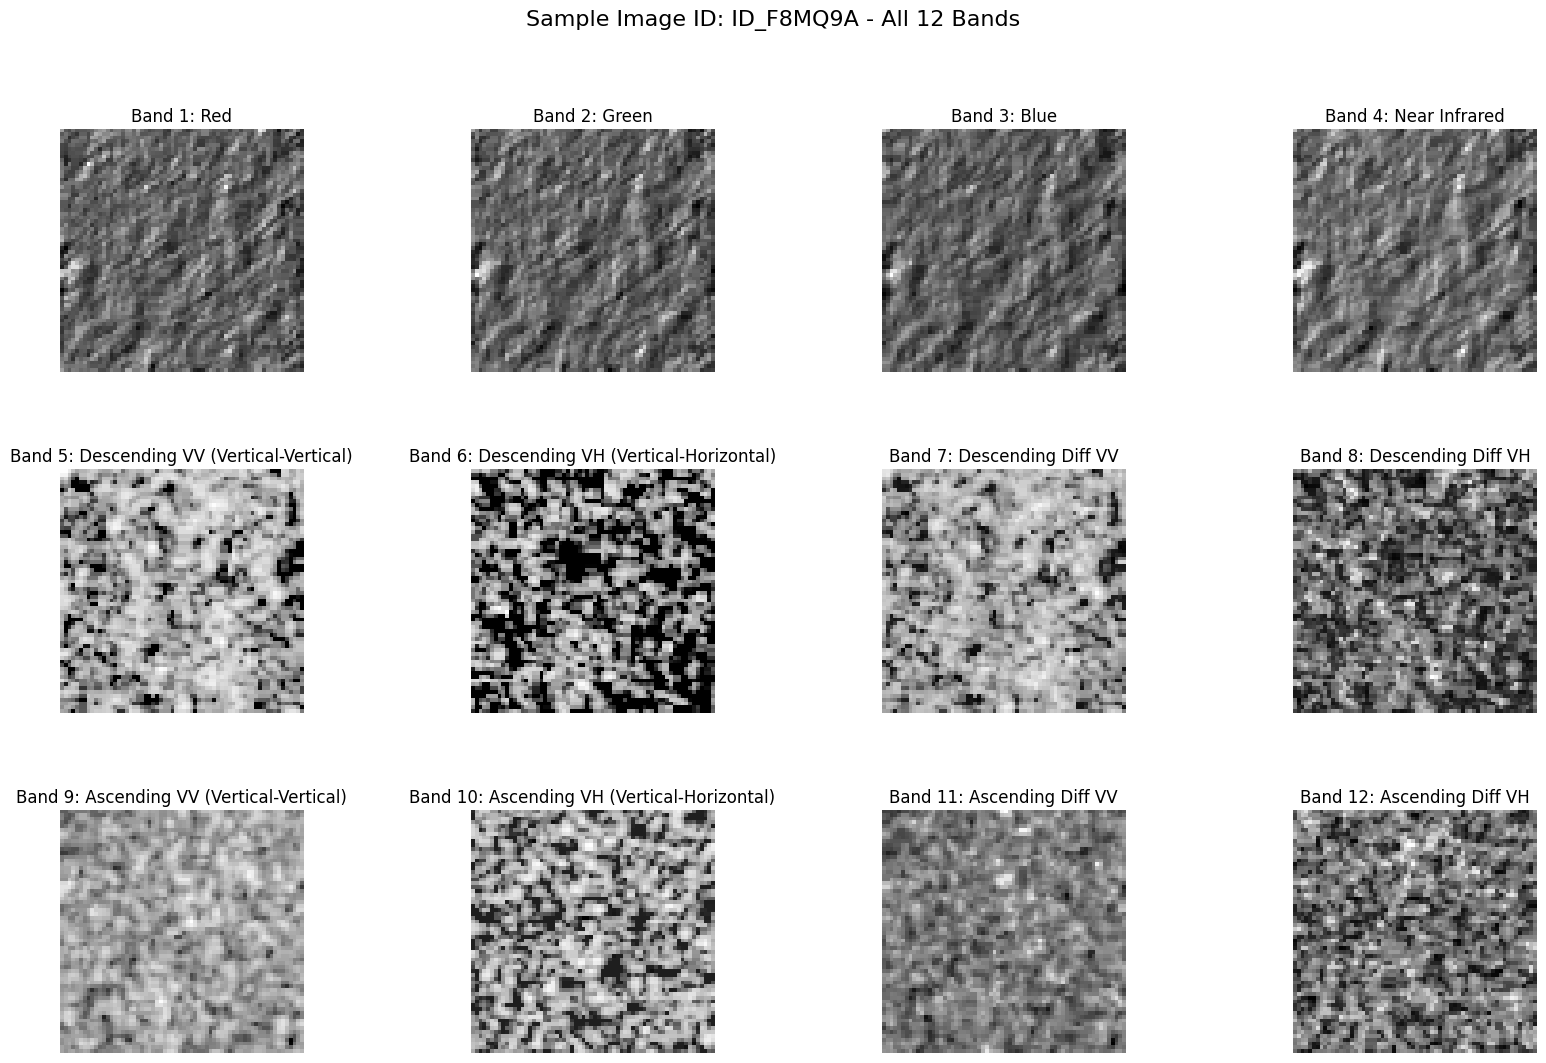

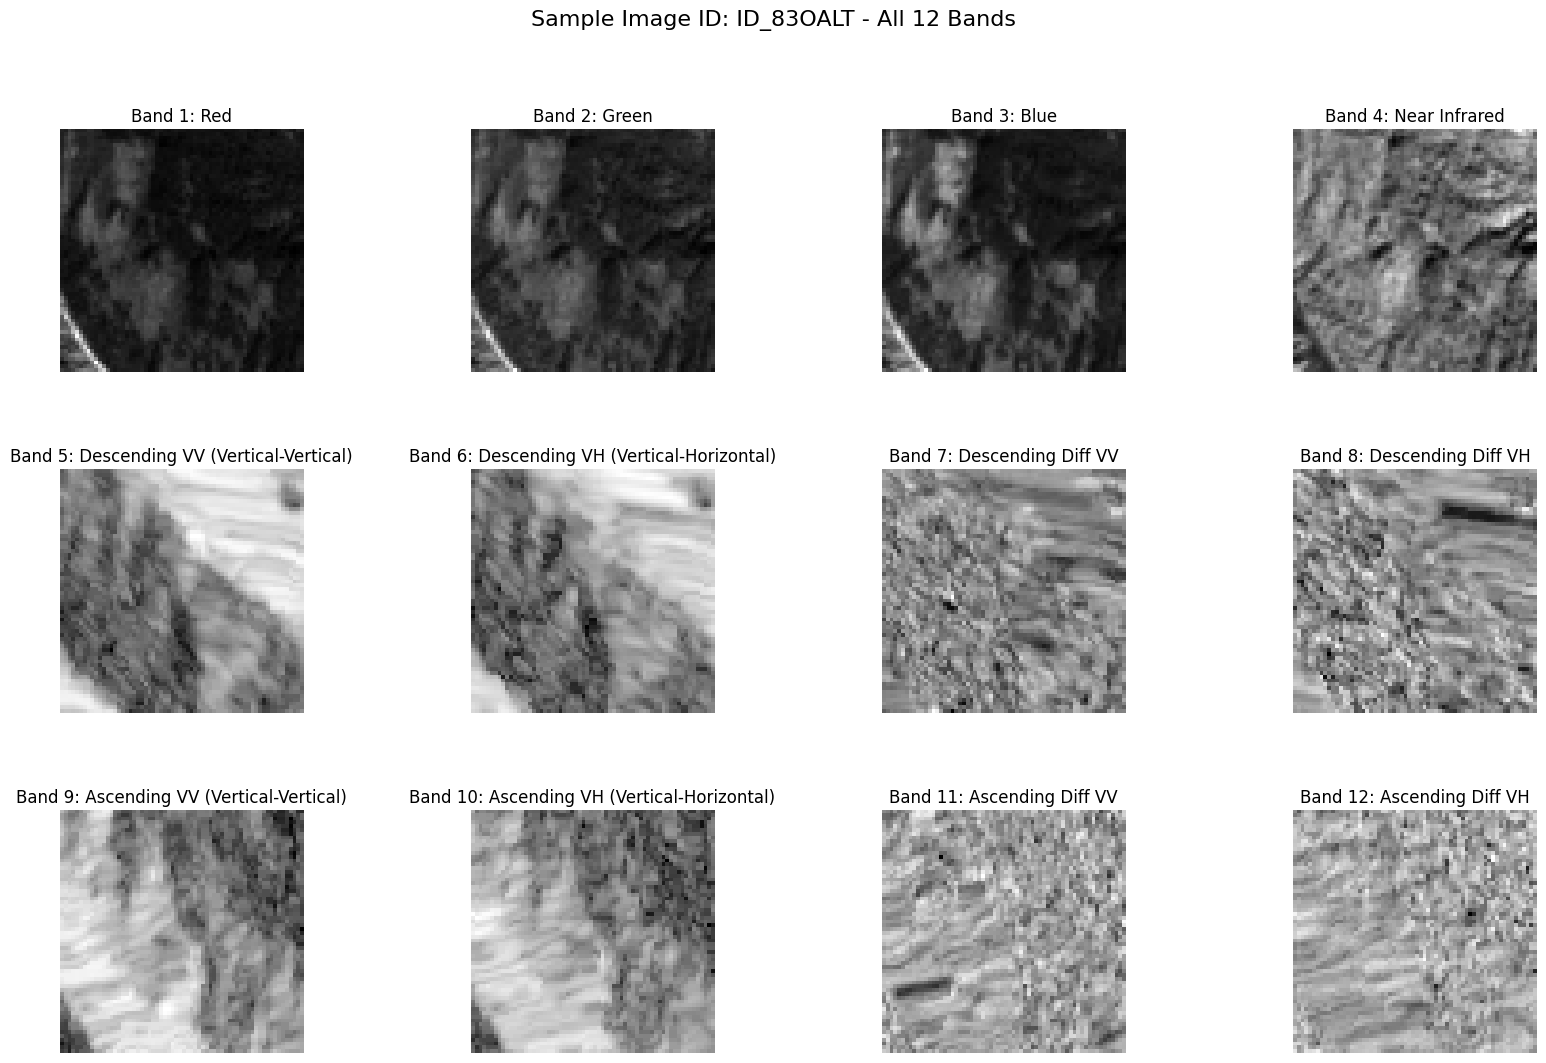

In [ ]:
# img = cv2.imread("img",torch.tensor(np.load('/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data/ID_005GY8.npy')))

# img = np.load('/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data/ID_007CM8.npy')

def load_and_normalize_npy_image(image_id, folder_path):
    """Loads a .npy file, normalizes each band, and returns the normalized image."""
    folder_path = '/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data/'
    image_path = os.path.join(folder_path, f"{image_id}.npy")
    img = np.load(image_path)

    # Normalize each band to the 0-1 range
    img_normalized = (img - img.min(axis=(0, 1))) / (img.max(axis=(0, 1)) - img.min(axis=(0, 1)) + 1e-5)
    return img_normalized

# Band descriptions
band_descriptions = [
    "Red", "Green", "Blue", "Near Infrared",
    "Descending VV (Vertical-Vertical)", "Descending VH (Vertical-Horizontal)",
    "Descending Diff VV", "Descending Diff VH",
    "Ascending VV (Vertical-Vertical)", "Ascending VH (Vertical-Horizontal)",
    "Ascending Diff VV", "Ascending Diff VH"
]

# Displaying a few example images with all 12 bands
example_ids = train_df['ID'].sample(2).values  # Randomly select 2 image IDs for illustration

for image_id in example_ids:
    img_normalized = load_and_normalize_npy_image(image_id, train_data_path)

    # Plot all 12 bands in a 3x4 grid
    fig, axes = plt.subplots(3, 4, figsize=(20, 12))  # 3 rows, 4 columns for 12 plots
    fig.suptitle(f"Sample Image ID: {image_id} - All 12 Bands", fontsize=16)

    # Display each of the 12 bands with descriptions
    for band in range(12):
        row = band // 4  # Calculate row index (0, 1, or 2)
        col = band % 4   # Calculate column index (0 to 3)
        axes[row, col].imshow(img_normalized[:, :, band], cmap='gray')
        axes[row, col].set_title(f"Band {band + 1}: {band_descriptions[band]}")
        axes[row, col].axis('off')

    plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing between plots
    plt.show()

Image shape: (64, 64, 12)


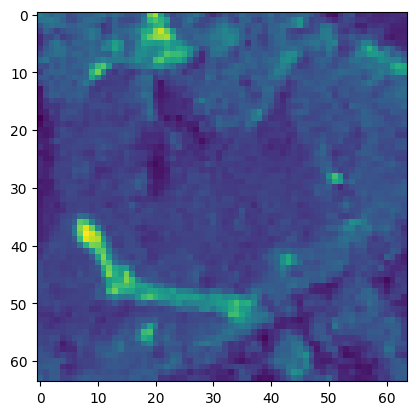

In [ ]:
img = np.load('/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data/ID_007CM8.npy')

# img, label = next(iter(train_loader))
plt.imshow(torch.tensor(img).permute([2,1,0])[0])
print(f"Image shape: {img.shape}")
# print(f"Image classes {image_classes}")
# print(f"label {label[0]}")

In [ ]:
train_df.loc[0]

ID       ID_HUD1ST
label            1
Name: 0, dtype: object

In [ ]:
train_dataset = LabeledNpyDataset(train_2,'/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data',data_transform,train=True)
__,_ = train_dataset[1]
print(__.shape,_)

torch.Size([12, 64, 64]) tensor(0.)


In [ ]:
test_dataset = LabeledNpyDataset(test_2,'/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data/',data_transform,train=True)
__,_ = test_dataset[1]
print(__.shape,_)

torch.Size([12, 64, 64]) tensor(0.)


In [ ]:
len(train_dataset),len(test_dataset)

(5002, 2145)

In [ ]:
train_df.head()

,ID,label
0,ID_HUD1ST,1
1,ID_KGE2HY,1
2,ID_VHV9BL,1
3,ID_ZT0VEJ,0
4,ID_5NFXVY,0


In [ ]:
from torch.utils.data import WeightedRandomSampler
import numpy as np
import torch

# Step 1: Get class counts
class_counts = train_2['label'].value_counts().to_dict()

# Step 2: Assign weights
class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
print("Class weight",class_weights)
sample_weights = [class_weights[label] for label in train_2['label']]
# print("Sample weights", sample_weights)
# Step 2: Assign weights
test_class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
test_sample_weights = [class_weights[label] for label in test_2['label']]

# Step 3: Create sampler
sampler = WeightedRandomSampler(weights=sample_weights,
                                 num_samples=len(sample_weights),
                                 replacement=True)

# train_dataloader = DataLoader(train_dataset,
#                               batch_size=BATCH_SIZE,
#                               sampler=sampler)

Class weight {0: 0.00024254183846713557, 1: 0.0011376564277588168}


In [ ]:
import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        gpu_props = torch.cuda.get_device_properties(i)
        print(f"\nGPU {i}: {gpu_name}")
        print(f"  Total Memory: {gpu_props.total_memory / 1e9:.2f} GB")
        print(f"  Multiprocessors (SMs): {gpu_props.multi_processor_count}")
        print(f"  CUDA Cores (approx): {gpu_props.multi_processor_count * 128} (assuming 128 cores/SM)")
        print(f"  Compute Capability: {gpu_props.major}.{gpu_props.minor}")
else:
    print("CUDA is not available on this system.")

Number of available GPUs: 2

GPU 0: Tesla T4
  Total Memory: 15.83 GB
  Multiprocessors (SMs): 40
  CUDA Cores (approx): 5120 (assuming 128 cores/SM)
  Compute Capability: 7.5

GPU 1: Tesla T4
  Total Memory: 15.83 GB
  Multiprocessors (SMs): 40
  CUDA Cores (approx): 5120 (assuming 128 cores/SM)
  Compute Capability: 7.5


In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 128

# Turn datasets into iterables (Batches)
train_dataloader = DataLoader(dataset = train_dataset,
                             batch_size = BATCH_SIZE,
                              sampler=sampler,
                                 num_workers=4,
                                pin_memory=True
                             )

test_dataloader = DataLoader(dataset=test_dataset,
                            batch_size = BATCH_SIZE,
                                num_workers=4,
                                pin_memory=True
                             )

In [ ]:
train_features_batch,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([128, 12, 64, 64]), torch.Size([128]))

In [ ]:
test_features_batch,test_label_batch = next(iter(test_dataloader))
test_features_batch.shape, test_label_batch.shape

(torch.Size([128, 12, 64, 64]), torch.Size([128]))

In [ ]:
import torch.nn as nn

In [ ]:
class SlideSeekModelV0(nn.Module):
    def __init__(self,in_channels : int,
                # hidden_units : int,
                out_channels : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=32, kernel_size=3, padding=1),
            nn.relu()


        )
    def forward(self,x):
        return self.layer_stack(x)


In [ ]:
class SlideSeekModel01(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1 ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                     out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        # print(f"Output shape for the first conv block {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output of the second conv block {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape for the classfier conv block {x.shape}")
        return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau,CosineAnnealingLR

In [ ]:
torch.manual_seed(42)
model_1=SlideSeekModel01(input_shape  = 12,
                    hidden_units = 10,
                    output_shape = 2).to(device)

class_counts = train_2['label'].value_counts().sort_index()
weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float32)
weights = weights / weights.sum()  # Normalize (optional)

loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)

# loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),lr=0.001)
scheduler = ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=2, verbose=True, min_lr=1e-6
)

NameError: name 'SlideSeekModel01' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LandslideCNN(nn.Module):
    def __init__(self, num_classes):
        super(LandslideCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=12, out_channels=32, kernel_size=3, padding=2)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)  # downsample from 64x64 → 32x32

        self.fc1 = nn.Linear(18496, 128)
        self.fc2 = nn.Linear(128, num_classes)
        # self.drop_out = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (B, 32, 32, 32)
        # print(x.shape)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # (B, 64, 16, 16)
        # print(x.shape)

        x = x.view(x.size(0), -1)  # flatten for FC
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = self.fc2(x)
        # print(x)
        return x


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
scheduler = ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=2, verbose=True, min_lr=1e-6
)

In [ ]:
from torch.optim.lr_scheduler import StepLR

model_2 = LandslideCNN(num_classes=2).to(device)
# loss_fn = nn.CrossEntropyLoss()
class_counts = train_df['label'].value_counts().sort_index()
weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float32)
weights = weights / weights.sum()  # Normalize (optional)

loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params = model_1.parameters(),lr=0.001)
optimizer = torch.optim.AdamW(params = model_2.parameters(),lr=0.0015)
scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=5, verbose=True,mode='max',min_lr=1e-8)

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [ ]:
def precision_score(y_true, y_pred):
    # y_pred = torch.argmax(y_pred, dim=1)
    true_positive = (y_pred == 1) & (y_true == 1)
    predicted_positive = (y_pred == 1)
    precision = true_positive.sum().float() / (predicted_positive.sum().float() + 1e-7)
    return precision.item()

def recall_score(y_true, y_pred):
    # y_pred = torch.argmax(y_pred, dim=1)
    true_positive = (y_pred == 1) & (y_true == 1)
    actual_positive = (y_true == 1)
    recall = true_positive.sum().float() / (actual_positive.sum().float() + 1e-7)
    return recall.item()

def f1_score(y_true, y_pred):
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + 1e-7)

In [ ]:
dummy_x = torch.rand([1, 12, 64, 64]).to(device)
model_2(dummy_x)

tensor([[0.4985, 0.5951]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        logpt = F.log_softmax(inputs, dim=1)
        pt = torch.exp(logpt)
        targets_one_hot = F.one_hot(targets, num_classes=inputs.size(1)).float()

        logpt = (logpt * targets_one_hot).sum(dim=1)
        pt = (pt * targets_one_hot).sum(dim=1)

        loss = -self.alpha * (1 - pt) ** self.gamma * logpt

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss


In [ ]:
class FocalLoss2(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super(FocalLoss2, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [ ]:
# from sklearn.metrics import accuracy_score
import copy
from tqdm.auto import tqdm

In [ ]:
loss_fn = FocalLoss(alpha=0.25, gamma=2.0,reduction='mean')

In [ ]:
loss_fn = FocalLoss2(alpha=0.25, gamma=2.0)

In [ ]:
def run_model(model_2, epochs=5, optimizer= optimizer,schesuler = scheduler, loss_fn=loss_fn, accuracy_fn=accuracy_fn, train_dataloader=train_dataloader, test_dataloader=test_dataloader, device=device):
    best_model_wts = copy.deepcopy(model_2.state_dict())
    best_acc = 0.0

    # scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch+1}\n-----")

        model_2.train()
        train_acc = 0.0
        train_loss = 0.0
        train_precision = 0.0
        train_recall = 0.0
        train_f1 = 0.0

        for batch, (X, y) in enumerate(train_dataloader):
            X = X.float().to(device)
            y = y.long().to(device)

            optimizer.zero_grad()
            y_pred = model_2(X)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            acc = accuracy_fn(y, y_pred.argmax(dim=1))
            # acc = accuracy_fn(y_test, test_pred.argmax(dim=1))
            ps = precision_score(y, y_pred.argmax(dim=1))
            rc = recall_score(y, y_pred.argmax(dim=1))
            fc = f1_score(y, y_pred.argmax(dim=1))

            train_acc += acc
            train_precision += ps
            train_recall += rc
            train_f1 += fc

        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)
        train_precision /= len(train_dataloader)
        train_recall /= len(train_dataloader)
        train_f1 /= len(train_dataloader)

        model_2.eval()
        test_acc = 0.0
        test_loss = 0.0
        test_precision = 0.0
        test_recall = 0.0
        test_f1 = 0.0

        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                X_test = X_test.float().to(device)
                y_test = y_test.long().to(device)

                test_pred = model_2(X_test)
                loss = loss_fn(test_pred, y_test)

                test_loss += loss.item()
                acc = accuracy_fn(y_test, test_pred.argmax(dim=1))
                ps = precision_score(y_test, test_pred.argmax(dim=1))
                rc = recall_score(y_test, test_pred.argmax(dim=1))
                fc = f1_score(y_test, test_pred.argmax(dim=1))

                test_acc += acc
                test_precision += ps
                test_recall += rc
                test_f1 += fc

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        test_precision /= len(test_dataloader)
        test_recall /= len(test_dataloader)
        test_f1 /= len(test_dataloader)


        print(f"Train Acc: {train_acc:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1: {train_f1:.4f} | Loss: {train_loss:.4f}")
        print(f"Test Acc: {test_acc:.4f} | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1: {test_f1:.4f} | Loss: {test_loss:.4f}")

        # Step the learning rate scheduler
        scheduler.step(test_acc)

        # Save the best model
        if test_acc > best_acc:
            best_acc = test_acc
            best_model_wts = copy.deepcopy(model_2.state_dict())
            torch.save(model_2.state_dict(), "best_model.pth")

    model_2.load_state_dict(best_model_wts)
    return model_2


def model_test(model, sub_name, device=device, test_loader=test_loader, test_df=test_df):
    # Load best model weights
    model.load_state_dict(torch.load("best_model.pth"))
    model.to(device)
    model.eval()

    all_preds = []

    with torch.no_grad():
        for X in test_loader:
            if isinstance(X, (tuple, list)):
                X = X[0]  # In case of (x, dummy_label)
            X = X.to(device).float()
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())

    test_df['label'] = all_preds
    test_df[['ID', 'label']].to_csv(sub_name, index=False)
    print(f"Saved predictions to {sub_name}")
    return all_preds


### Original

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 20
def run_model(model_2,epochs,train_dataloader=train_dataloader,test_dataloader = test_dataloader):
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n-----")
        train_acc = 0
        for batch, (X,y) in enumerate(train_dataloader):
            # X = X.torch
            X = X.float().to(device)   # Force float32
            y = y.long().to(device)

            model_2.train()
            y_pred = model_2(X)

            loss=loss_fn(y_pred,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss /= len(train_dataloader)
            acc  = accuracy_fn(y,y_pred.argmax(dim=1))
            train_acc += acc

            model_2.eval()
            test_ac = 0
            with torch.inference_mode():
                for X_test,y_test in test_dataloader:
                    X_test = X_test.float().to(device)
                    y_test = y_test.long().to(device)
                    test_pred = model_2(X_test)
                    test_loss = loss_fn(test_pred,y_test)
                    test_acc = accuracy_fn(y_test,test_pred.argmax(dim=1))
                    test_ac += test_acc

                test_ac /= len(test_dataloader)
            train_acc /= len(train_dataloader)

        print(f"Train accuracy {train_acc:.4f}| Train loss {loss:.4f}| Test accuracy {test_ac:.4f}| Test Loss {test_loss:.4f}")

    return y_pred


In [ ]:
# torch.manual_seed(42)
# model_3=SlideSeekModelV0(12,2).to(device)

# class_counts = train_2['label'].value_counts().sort_index()
# weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float32)
# weights = weights / weights.sum()  # Normalize (optional)

# loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)

# # loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params = model_1.parameters(),lr=0.001)

In [ ]:
train_dataset = LabeledNpyDataset(train_df,'/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data',data_transform,train=True)
__,_ = train_dataset[1]
print(__.shape,_)

torch.Size([12, 64, 64]) tensor(1.)


In [ ]:
model_2_pred = model_test(model_2,'model_on.csv')

/tmp/ipykernel_3956/3718824491.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


RuntimeError: Error(s) in loading state_dict for LandslideCNN:
	Missing key(s) in state_dict: "conv1.bias", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "conv2.weight", "conv2.bias", "bn2.weight", "bn2.bias", "bn2.running_mean", "bn2.running_var", "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias". 
	Unexpected key(s) in state_dict: "features.0.weight", "features.0.bias", "features.2.weight", "features.2.bias", "features.5.weight", "features.5.bias", "features.7.weight", "features.7.bias", "features.10.weight", "features.10.bias", "features.12.weight", "features.12.bias", "features.14.weight", "features.14.bias", "features.17.weight", "features.17.bias", "features.19.weight", "features.19.bias", "features.21.weight", "features.21.bias", "features.24.weight", "features.24.bias", "features.26.weight", "features.26.bias", "features.28.weight", "features.28.bias", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias". 
	size mismatch for conv1.weight: copying a param with shape torch.Size([64, 12, 7, 7]) from checkpoint, the shape in current model is torch.Size([32, 12, 3, 3]).

In [ ]:
model_2_output = run_model(model_2,epochs=30)
model_2_pred = model_test(model_2,'model_2_one.csv')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1
-----
Train Acc: 73.5664 | Precision: 0.1476 | Recall: 0.1632 | F1: 0.1045 | Loss: 0.1118
Test Acc: 82.2392 | Precision: 0.2549 | Recall: 0.0217 | F1: 0.0389 | Loss: 0.0323
Epoch: 2
-----
Train Acc: 81.7773 | Precision: 0.1201 | Recall: 0.0261 | F1: 0.0414 | Loss: 0.0310
Test Acc: 80.9359 | Precision: 0.2831 | Recall: 0.0724 | F1: 0.1126 | Loss: 0.0276
Epoch: 3
-----
Train Acc: 80.9258 | Precision: 0.2706 | Recall: 0.0396 | F1: 0.0639 | Loss: 0.0288
Test Acc: 80.6639 | Precision: 0.3003 | Recall: 0.0738 | F1: 0.1152 | Loss: 0.0291
Epoch: 4
-----
Train Acc: 80.4180 | Precision: 0.2038 | Recall: 0.0870 | F1: 0.1147 | Loss: 0.0290
Test Acc: 82.4690 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000 | Loss: 0.0284
Epoch: 5
-----
Train Acc: 80.8867 | Precision: 0.3072 | Recall: 0.1070 | F1: 0.1425 | Loss: 0.0276
Test Acc: 82.6382 | Precision: 0.2941 | Recall: 0.0128 | F1: 0.0246 | Loss: 0.0267
Epoch: 6
-----
Train Acc: 81.6836 | Precision: 0.4412 | Recall: 0.1552 | F1: 0.2193 | Loss

/tmp/ipykernel_31/2215140568.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Saved predictions to model_2_one.csv


In [ ]:
model_1_output = run_model(model_2,epochs=30)
model_1_pred = model_test(model_2,'model_1_one.csv')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1
-----
Train Acc: 18.3125 | Precision: 0.1832 | Recall: 0.9991 | F1: 0.3082 | Loss: 0.0950
Test Acc: 17.4850 | Precision: 0.1749 | Recall: 1.0000 | F1: 0.2967 | Loss: 0.0916
Epoch: 2
-----
Train Acc: 19.0117 | Precision: 0.1901 | Recall: 1.0000 | F1: 0.3175 | Loss: 0.0935
Test Acc: 17.4850 | Precision: 0.1749 | Recall: 1.0000 | F1: 0.2967 | Loss: 0.0929
Epoch: 3
-----
Train Acc: 18.1758 | Precision: 0.1816 | Recall: 0.9991 | F1: 0.3061 | Loss: 0.0937
Test Acc: 17.4850 | Precision: 0.1749 | Recall: 1.0000 | F1: 0.2967 | Loss: 0.0942
Epoch: 4
-----
Train Acc: 18.5703 | Precision: 0.1857 | Recall: 1.0000 | F1: 0.3122 | Loss: 0.0940
Test Acc: 17.4850 | Precision: 0.1749 | Recall: 1.0000 | F1: 0.2967 | Loss: 0.0968
Epoch: 5
-----
Train Acc: 17.9883 | Precision: 0.1799 | Recall: 0.9750 | F1: 0.3023 | Loss: 0.0954
Test Acc: 17.4850 | Precision: 0.1749 | Recall: 1.0000 | F1: 0.2967 | Loss: 0.0980
Epoch: 6
-----
Train Acc: 17.6484 | Precision: 0.1765 | Recall: 1.0000 | F1: 0.2986 | Loss

/tmp/ipykernel_31/2215140568.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Saved predictions to model_1_one.csv


In [ ]:
model_2_output = run_model(model_2,epochs=30)
model_2_pred = model_test(model_2,'model_2_4.csv')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1
-----
Train Acc: 48.3633 | Precision: 0.1611 | Recall: 0.4692 | F1: 0.2375 | Loss: 0.0456
Test Acc: 52.3153 | Precision: 0.1770 | Recall: 0.4763 | F1: 0.2563 | Loss: 0.0440
Epoch: 2
-----
Train Acc: 49.7422 | Precision: 0.1664 | Recall: 0.4734 | F1: 0.2436 | Loss: 0.0453
Test Acc: 50.8888 | Precision: 0.1635 | Recall: 0.4425 | F1: 0.2373 | Loss: 0.0443
Epoch: 3
-----
Train Acc: 49.4414 | Precision: 0.1892 | Recall: 0.5231 | F1: 0.2754 | Loss: 0.0452
Test Acc: 51.6700 | Precision: 0.1701 | Recall: 0.4511 | F1: 0.2458 | Loss: 0.0450
Epoch: 4
-----
Train Acc: 49.7578 | Precision: 0.1852 | Recall: 0.4869 | F1: 0.2647 | Loss: 0.0452
Test Acc: 47.7325 | Precision: 0.1674 | Recall: 0.5015 | F1: 0.2499 | Loss: 0.0449
Epoch: 5
-----
Train Acc: 49.3320 | Precision: 0.1536 | Recall: 0.4683 | F1: 0.2289 | Loss: 0.0451
Test Acc: 50.3724 | Precision: 0.1648 | Recall: 0.4501 | F1: 0.2401 | Loss: 0.0450
Epoch: 6
-----
Train Acc: 48.9102 | Precision: 0.1755 | Recall: 0.4738 | F1: 0.2504 | Loss

/tmp/ipykernel_31/2215140568.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Saved predictions to model_2_4.csv


In [ ]:
# new_model = model_2.load_state_dict(torch.load('/kaggle/working/best_model.pth'))
model_2_pred = model_test(model_2,'model2.csv')

In [ ]:
model_2_output = run_model(model_2,epochs=50)
model_2_pred = model_test(model_2,'model2_weight7.csv')

In [ ]:
model_2_output = run_model(model_2,epochs=30)
model_2_pred = model_test(model_2,'model2_weight4.csv')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1
-----
Train Acc: 80.9766 | Precision: 0.7353 | Recall: 0.9574 | F1: 0.8294 | Loss: 0.2461
Test Acc: 60.6551 | Precision: 0.2864 | Recall: 0.8349 | F1: 0.4240 | Loss: 0.6412
Epoch: 2
-----
Train Acc: 72.4297 | Precision: 0.6501 | Recall: 0.9794 | F1: 0.7791 | Loss: 0.3450
Test Acc: 65.9969 | Precision: 0.3355 | Recall: 0.9641 | F1: 0.4956 | Loss: 0.6216
Epoch: 3
-----
Train Acc: 78.8203 | Precision: 0.7139 | Recall: 0.9741 | F1: 0.8222 | Loss: 0.2400
Test Acc: 69.4251 | Precision: 0.3634 | Recall: 0.9775 | F1: 0.5269 | Loss: 0.7045
Epoch: 4
-----
Train Acc: 83.0156 | Precision: 0.7573 | Recall: 0.9793 | F1: 0.8528 | Loss: 0.2140
Test Acc: 76.1456 | Precision: 0.4243 | Recall: 0.9632 | F1: 0.5849 | Loss: 0.4143
Epoch: 5
-----
Train Acc: 82.2305 | Precision: 0.7440 | Recall: 0.9771 | F1: 0.8429 | Loss: 0.2239
Test Acc: 57.0393 | Precision: 0.2893 | Recall: 0.9918 | F1: 0.4459 | Loss: 0.7080
Epoch: 6
-----
Train Acc: 82.5117 | Precision: 0.7473 | Recall: 0.9797 | F1: 0.8461 | Loss

In [ ]:
del model_2  # or any other model/variables

In [ ]:
model_2_output = run_model(model_2,epochs=50)
model_2_pred = model_test(model_2,'model2_weight5.csv')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>if w.is_alive():

Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
      self._shutdown_workers() 
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
     if w.is_alive(): Exception ignored in: 
^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>^ 
^ Traceback (most recent call last):
Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d21

Train Acc: 51.8438 | Precision: 0.5095 | Recall: 0.8993 | F1: 0.6326 | Loss: 1.1177
Test Acc: 18.6339 | Precision: 0.1769 | Recall: 1.0000 | F1: 0.2997 | Loss: 1.1736
Epoch: 2
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():Exception ignored in: 
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680> <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
 
 Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
         self._shutdown_workers()self._shutdown_workers() 

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 158

Train Acc: 57.5430 | Precision: 0.5467 | Recall: 0.9872 | F1: 0.7019 | Loss: 0.4744
Test Acc: 37.2641 | Precision: 0.2171 | Recall: 0.9906 | F1: 0.3547 | Loss: 0.8435
Epoch: 3
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>^^
^
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    assert self._parent_pid == os.getpid(), 'can only test a child process'    
self._shutdown_workers()
    File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
     if w.is_alive(): 
            ^  ^^^^^^^^^^^^^^^^^^^^^^^^

Train Acc: 61.7383 | Precision: 0.5677 | Recall: 0.9848 | F1: 0.7184 | Loss: 0.4754
Test Acc: 38.2585 | Precision: 0.2177 | Recall: 0.9722 | F1: 0.3542 | Loss: 0.8052
Epoch: 4
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>^
^Traceback (most recent call last):
^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
^    ^self._shutdown_workers()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

      if w.is_alive(): 
               ^^^^^^^^^^^^^^^^^^^^^^^
^

Train Acc: 62.3398 | Precision: 0.5709 | Recall: 0.9872 | F1: 0.7223 | Loss: 0.4296
Test Acc: 37.3853 | Precision: 0.2161 | Recall: 0.9812 | F1: 0.3527 | Loss: 0.9536
Epoch: 5
-----


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

Traceback (most recent call last):
      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
self._shutdown_workers()    self._shutdown_workers()

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
        if w.is_alive():if w.is_alive():

             ^ ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3

Train Acc: 61.4922 | Precision: 0.5684 | Recall: 0.9863 | F1: 0.7197 | Loss: 0.3997
Test Acc: 38.3504 | Precision: 0.2205 | Recall: 0.9933 | F1: 0.3594 | Loss: 0.8466
Epoch: 6
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

    Traceback (most recent call last):
if w.is_alive():
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
       self._shutdown_workers()
    File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
      ^if w.is_alive():^
^^  ^ ^^  ^ ^ ^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'
^ ^ ^   ^^  
    File "/usr/l

Train Acc: 62.2266 | Precision: 0.5752 | Recall: 0.9886 | F1: 0.7261 | Loss: 0.4121
Test Acc: 38.7015 | Precision: 0.2216 | Recall: 0.9939 | F1: 0.3610 | Loss: 1.1525
Epoch: 7
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 15

Train Acc: 63.7734 | Precision: 0.5835 | Recall: 0.9826 | F1: 0.7299 | Loss: 0.4161
Test Acc: 38.6262 | Precision: 0.2218 | Recall: 0.9978 | F1: 0.3615 | Loss: 1.1456
Epoch: 8
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
 Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>     self._shutdown_workers()
  
Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packa

Train Acc: 61.7969 | Precision: 0.5642 | Recall: 0.9915 | F1: 0.7178 | Loss: 0.3734
Test Acc: 39.2236 | Precision: 0.2222 | Recall: 0.9874 | F1: 0.3613 | Loss: 0.7732
Epoch: 9
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
Exception ignored in: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    
self._shutdown_workers()    Traceback (most recent call last):

self._shutdown_workers()  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

Exception ignored in:           File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
se

Train Acc: 65.1055 | Precision: 0.5943 | Recall: 0.9878 | F1: 0.7398 | Loss: 0.3413
Test Acc: 41.6739 | Precision: 0.2304 | Recall: 0.9930 | F1: 0.3724 | Loss: 0.8964
Epoch: 10
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
Exception ignored in: Exception ignored in:   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>    <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
if w.is_alive():Traceback (most recent call last):


  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Exception ignored in: Traceback (most recent call last):
     <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
 self._shutdown_workers()     

self._shutdown_workers() Tr

Train Acc: 63.8828 | Precision: 0.5848 | Recall: 0.9916 | F1: 0.7344 | Loss: 0.3474
Test Acc: 44.2143 | Precision: 0.2376 | Recall: 0.9845 | F1: 0.3810 | Loss: 0.5998
Epoch: 11
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680> 
  Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
^Exception ignored in:     ^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>self._shutdown_workers()Exception ignored in: ^
Traceback (most recent call last):

<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
  File "/usr/local/lib/p

Train Acc: 65.2812 | Precision: 0.5988 | Recall: 0.9857 | F1: 0.7426 | Loss: 0.3511
Test Acc: 37.6004 | Precision: 0.2190 | Recall: 1.0000 | F1: 0.3581 | Loss: 1.0677
Epoch: 12
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
       Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>^
Traceback (most recent call last):
^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
^    ^Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>^
Exception ignored in: ^
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
^^Traceback (most recent call last):

    Trac

Train Acc: 63.9531 | Precision: 0.5841 | Recall: 0.9913 | F1: 0.7336 | Loss: 0.3319
Test Acc: 53.0430 | Precision: 0.2673 | Recall: 0.9617 | F1: 0.4164 | Loss: 0.5735
Epoch: 13
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Exception ignored in: Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680><function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__


Traceback (most recent call last):
    Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
self._shutdown_workers()  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

    self._shutdown_workers()      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

    self._shutdown_workers()Exception ignored in: 
if w.is_alive():  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloade

Train Acc: 66.9219 | Precision: 0.6079 | Recall: 0.9887 | F1: 0.7504 | Loss: 0.3258
Test Acc: 38.5342 | Precision: 0.2217 | Recall: 1.0000 | F1: 0.3616 | Loss: 1.6588
Epoch: 14
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
 Exception ignored in:    <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  
 Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
^
^^    Traceback (most recent call last):
^self._shutdown_workers()^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_worker

Train Acc: 67.9062 | Precision: 0.6081 | Recall: 0.9867 | F1: 0.7503 | Loss: 0.3185
Test Acc: 46.6206 | Precision: 0.2459 | Recall: 0.9886 | F1: 0.3922 | Loss: 0.6690
Epoch: 15
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    Exception ignored in: self._shutdown_workers()
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

    Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
if w.is_alive():    
self._shutdown_workers() 
Exception ignored in:    File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>       
if w.is_alive(): Traceback (most recent call last):
 
Exception ignored in:   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data

Train Acc: 69.0781 | Precision: 0.6151 | Recall: 0.9785 | F1: 0.7533 | Loss: 0.3298
Test Acc: 63.9621 | Precision: 0.2861 | Recall: 0.7101 | F1: 0.4055 | Loss: 0.5747
Epoch: 16
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>    
self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>    if w.is_alive():self._shutdown_workers()


 Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
          

Train Acc: 66.1797 | Precision: 0.6000 | Recall: 0.9826 | F1: 0.7430 | Loss: 0.3329
Test Acc: 40.6316 | Precision: 0.2275 | Recall: 0.9950 | F1: 0.3687 | Loss: 0.7881
Epoch: 17
-----


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680><function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Traceback (most recent call last):
    self._shutdown_workers()  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
self._shutdown_workers()    
if w.is_alive():  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

     if w.is_alive(): 
         ^ ^ ^^ ^^^^^^^^^^^^^^
^^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^^
^  
    File "/usr/lib/py

Train Acc: 71.9180 | Precision: 0.6500 | Recall: 0.9803 | F1: 0.7791 | Loss: 0.2868
Test Acc: 40.0195 | Precision: 0.2263 | Recall: 1.0000 | F1: 0.3676 | Loss: 0.8959
Epoch: 18
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
Traceback (most recent call last):
    if w.is_alive():  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

      Exception ignored in:  self._shutdown_workers()Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/

Train Acc: 71.4180 | Precision: 0.6417 | Recall: 0.9763 | F1: 0.7721 | Loss: 0.3035
Test Acc: 37.8909 | Precision: 0.2199 | Recall: 1.0000 | F1: 0.3592 | Loss: 1.4853
Epoch: 19
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>self._shutdown_workers()

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
        self._shutdown_workers()if w.is_alive():

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
      Exception ignored in: if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680> 

 Traceback (most recent call last):
    File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1

Train Acc: 69.7344 | Precision: 0.6342 | Recall: 0.9854 | F1: 0.7701 | Loss: 0.2963
Test Acc: 77.2926 | Precision: 0.4282 | Recall: 0.8522 | F1: 0.5662 | Loss: 0.4983
Epoch: 20
-----


Exception ignored in: Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680><function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Traceback (most recent call last):
Traceback (most recent call last):
      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
self._shutdown_workers()    
    self._shutdown_workers()  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
self._shutdown_workers()
    
if w.is_alive():  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _

Train Acc: 74.1172 | Precision: 0.6602 | Recall: 0.9786 | F1: 0.7859 | Loss: 0.2998
Test Acc: 79.1749 | Precision: 0.3834 | Recall: 0.3146 | F1: 0.3366 | Loss: 0.7126
Epoch: 21
-----


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
        Exception ignored in:     self._shutdown_workers()self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>self._shutdown_workers()


  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

  File "/usr/local/lib/pyt

Train Acc: 72.5508 | Precision: 0.6550 | Recall: 0.9726 | F1: 0.7796 | Loss: 0.3017
Test Acc: 45.6058 | Precision: 0.2438 | Recall: 1.0000 | F1: 0.3904 | Loss: 0.7444
Epoch: 22
-----


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():Exception ignored in: 
 <function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680>
  Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
      self._shutdown_workers() ^
^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
^    ^if w.is_alive():Exception ignored in: ^
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d213ea50680> ^ 
^ Traceback (most recent call last):
^ ^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataload

In [ ]:
model_2_pred = model_test(model_2,'model2_weight2.csv')

In [ ]:
in_channel = 12
num_classes = 2
learning_rate = 0.015
batch_size = 64
num_epochs = 5

In [ ]:
model_4 = torchvision.models.resnet18(pretrained=False).to(device)
# model.features[0] = nn.Conv2d(in_channels=1,out_channels=64,kernel_size=(3,3)).to(device)
model_4.conv1 = nn.Conv2d(12, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)
# nn.Conv2d()
# print(model)
# model_4.avgpool = Identity().to(device)
# model.classifier[0] = nn.Linear(512,10)

# for adding multiple layer with nn.Sequential
model_4.fc = nn.Sequential(nn.Linear(512,100),
                                 nn.Linear(100,2)).to(device)

# for i in range(1,7):
#     model.classifier[i] = Identity()
# print(model_4)

# sys.exit()
# model = NN(input_size=input_size,num_classes=num_classes).to(device)

loss_fn = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model_4.parameters(),lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.1,patience=3,verbose =True)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3,
    steps_per_epoch=len(train_dataloader),
    epochs=5
)

In [ ]:
run_model(model_4,epochs=15)
model_4_pred = model_test(model_4,"model_4.csv")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1
-----
Train Acc: 50.6016 | Train Loss: 0.6020 | Test Acc: 17.8617 | Test Loss: 0.7102
Epoch: 2
-----
Train Acc: 49.9180 | Train Loss: 0.6001 | Test Acc: 18.0014 | Test Loss: 0.7120
Epoch: 3
-----
Train Acc: 50.0234 | Train Loss: 0.6011 | Test Acc: 18.0621 | Test Loss: 0.7129
Epoch: 4
-----
Train Acc: 48.6406 | Train Loss: 0.6008 | Test Acc: 18.1080 | Test Loss: 0.7125
Epoch: 5
-----
Train Acc: 50.0586 | Train Loss: 0.6002 | Test Acc: 17.9389 | Test Loss: 0.7132
Epoch: 6
-----
Train Acc: 50.7578 | Train Loss: 0.5995 | Test Acc: 17.9702 | Test Loss: 0.7136
Epoch: 7
-----
Train Acc: 49.9023 | Train Loss: 0.5999 | Test Acc: 18.2000 | Test Loss: 0.7141
Epoch: 8
-----
Train Acc: 49.5273 | Train Loss: 0.5979 | Test Acc: 18.0934 | Test Loss: 0.7124
Epoch: 9
-----
Train Acc: 50.6523 | Train Loss: 0.5989 | Test Acc: 18.2606 | Test Loss: 0.7135
Epoch: 10
-----
Train Acc: 49.8281 | Train Loss: 0.6036 | Test Acc: 18.0308 | Test Loss: 0.7133
Epoch: 11
-----
Train Acc: 49.1406 | Train Loss: 

/tmp/ipykernel_3956/3718824491.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Saved predictions to model_4.csv


In [ ]:
model_4_pred = model_test(model_4,"model_42.csv")

/tmp/ipykernel_3956/3718824491.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Saved predictions to model_42.csv


In [ ]:
run_model(model_4,epochs=5)

In [ ]:
run_model(model_4,epochs=5)

In [ ]:
testing = model_test(model_4,'model_4again.csv')

In [ ]:
model_5 = torchvision.models.vgg16(weights=None).to(device)
model_5.features[0] = nn.Conv2d(in_channels=12,out_channels=64,kernel_size=(3,3)).to(device)
# model_5.conv_proj = nn.Conv2d(12, 768, kernel_size=7, stride=2, padding=3, bias=False).to(device)
# print(model_5.conv_proj)
# print(model_5)
# model.features[0] = nn.Conv2d(in_channels=1,out_channels=64,kernel_size=(3,3)).to(device)
model_5.conv1 = nn.Conv2d(12, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)
# nn.Conv2d()
# print(model)
# model_4.avgpool = Identity().to(device)
# # model.classifier[0] = nn.Linear(512,10)

loss_fn = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model_5.parameters(),lr=0.0001)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.1,patience=3,verbose =True)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3,
    steps_per_epoch=len(train_dataloader),
    epochs=5
)

In [ ]:
15e-6

1.5e-05

In [ ]:
run_model(model_5,epochs=30)
model_5_pred = model_test(model_5,"model_5.csv")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1
-----
Train Acc: 49.6133 | Train Loss: 306.0658 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 2
-----
Train Acc: 51.2266 | Train Loss: 291.0554 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 3
-----
Train Acc: 50.0078 | Train Loss: 297.3468 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 4
-----
Train Acc: 50.9570 | Train Loss: 283.3754 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 5
-----
Train Acc: 49.0273 | Train Loss: 294.0476 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 6
-----
Train Acc: 48.7422 | Train Loss: 303.8999 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 7
-----
Train Acc: 50.0195 | Train Loss: 316.7886 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 8
-----
Train Acc: 50.4688 | Train Loss: 296.0447 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 9
-----
Train Acc: 48.1094 | Train Loss: 310.0828 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 10
-----
Train Acc: 49.1523 | Train Loss: 303.0266 | Test Acc: 82.4894 | Test Loss: 159.9203
Epoch: 11

/tmp/ipykernel_3956/3718824491.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Saved predictions to model_5.csv


In [ ]:
def model_test(model,sub_name):
    all_preds = []

    with torch.no_grad():
        model.eval()
        for batch in test_loader:
            batch = batch.to(device)
            logits = model(batch)  # shape: [BATCH_SIZE, NUM_CLASSES]
            predicted_labels = torch.argmax(logits, dim=1)  # take max class index
            all_preds.extend(predicted_labels.cpu().numpy())
    # print(all_preds)
    test_df['label'] = all_preds
    test_df[['ID', 'label']].to_csv(sub_name, index=False)
    return all_preds

In [ ]:
class TestDataset(Dataset):
    def __init__(self, df, data_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.df.iloc[idx]['ID'] + '.npy'
        file_path = os.path.join(self.data_dir, file_name)
        image = np.load(file_path)  # shape: (64, 64, 12)

        # Convert to torch tensor and permute to (C, H, W)
        image = torch.from_numpy(image).float().permute(2, 0, 1)

        if self.transform:
            image = self.transform(image)

        return image

In [ ]:
test = TestDataset(test_df,"/kaggle/input/slideandseekclasificationlandslidedetectiondataset/test_data/test_data")
len(test)

5398

In [ ]:
next(iter(test)).shape

torch.Size([12, 64, 64])

In [ ]:
test_loader = DataLoader(test, batch_size=128, shuffle=False)

In [ ]:
model_test(model_5,'model_5.csv')

In [ ]:
model_5 = torchvision.models.efficientnet_b0(weights=None).to(device)
# model.features[0] = nn.Conv2d(in_channels=1,out_channels=64,kernel_size=(3,3)).to(device)
model_5.features[0] = nn.Conv2d(12, 32, kernel_size=7, stride=2, padding=3, bias=False).to(device)
model_5.classifier[1] = nn.Linear(in_features=1280, out_features=2, bias=True).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_5.parameters(),lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.1,patience=3,verbose =True)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3,
    steps_per_epoch=len(train_dataloader),
    epochs=5
)

In [ ]:
run_model(model_5,epochs= 5)

In [ ]:
model_test(model_5,'sub_name.csv')

In [ ]:
big = pd.read_csv('/kaggle/working/model_predictions_submission.csv')
big.head()

In [ ]:
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        preds = model_2(batch)  # logits
        preds = torch.sigmoid(preds).squeeze()  # binary classification
        predicted_labels = (preds > 0.5).int()
        all_preds.extend(predicted_labels.cpu().numpy())


In [ ]:
test_df['label'] = all_preds
test_df[['ID', 'label']].to_csv('OneCycleLR.csv', index=False)